In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-most-expensive-football-transfers/football_players.csv


In [2]:
df = pd.read_csv('../input/the-most-expensive-football-transfers/football_players.csv')

**lets do some EDA**

In [3]:
df.head()

,Rank,Origin,Player,From(Country),From(Club),To(Country),To(Club),Position,Fee(€ mln),Fee(£ mln),Year,Born
0,1,Brazil,Neymar,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.0,£198,2017,1992
1,2,France,Kylian Mbappé,France,Monaco,France,Paris Saint-Germain,Forward,180.0,£163,2018,1998
2,3,Brazil,Philippe Coutinho,England,Liverpool,Spain,Barcelona,Midfielder,145.0,£105,2018,1992
3,4,Portugal,João Félix,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,£104.1,2019,1999
4,5,France,Antoine Griezmann,Spain,Atlético Madrid,Spain,Barcelona,Forward,120.0,£107,2019,1991


In [4]:
df.isnull()

,Rank,Origin,Player,From(Country),From(Club),To(Country),To(Club),Position,Fee(€ mln),Fee(£ mln),Year,Born
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.columns

Index(['Rank', 'Origin', 'Player', 'From(Country)', 'From(Club)',
       'To(Country)', 'To(Club)', 'Position', 'Fee(€ mln)', 'Fee(£ mln)',
       'Year', 'Born'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           54 non-null     int64  
 1   Origin         54 non-null     object 
 2   Player         54 non-null     object 
 3   From(Country)  54 non-null     object 
 4   From(Club)     54 non-null     object 
 5   To(Country)    54 non-null     object 
 6   To(Club)       54 non-null     object 
 7   Position       54 non-null     object 
 8   Fee(€ mln)     54 non-null     float64
 9   Fee(£ mln)     54 non-null     object 
 10  Year           54 non-null     int64  
 11  Born           54 non-null     int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 5.2+ KB


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df1 = df.groupby('From(Club)', as_index=False,sort=True)['Fee(€ mln)'].sum()
df1= df1.sort_values('Fee(€ mln)', ascending=False)
df.head()

,Rank,Origin,Player,From(Country),From(Club),To(Country),To(Club),Position,Fee(€ mln),Fee(£ mln),Year,Born
0,1,Brazil,Neymar,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.0,£198,2017,1992
1,2,France,Kylian Mbappé,France,Monaco,France,Paris Saint-Germain,Forward,180.0,£163,2018,1998
2,3,Brazil,Philippe Coutinho,England,Liverpool,Spain,Barcelona,Midfielder,145.0,£105,2018,1992
3,4,Portugal,João Félix,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,£104.1,2019,1999
4,5,France,Antoine Griezmann,Spain,Atlético Madrid,Spain,Barcelona,Forward,120.0,£107,2019,1991


Text(0.5, 1.0, '10 clubs with the highest transfer revenues')

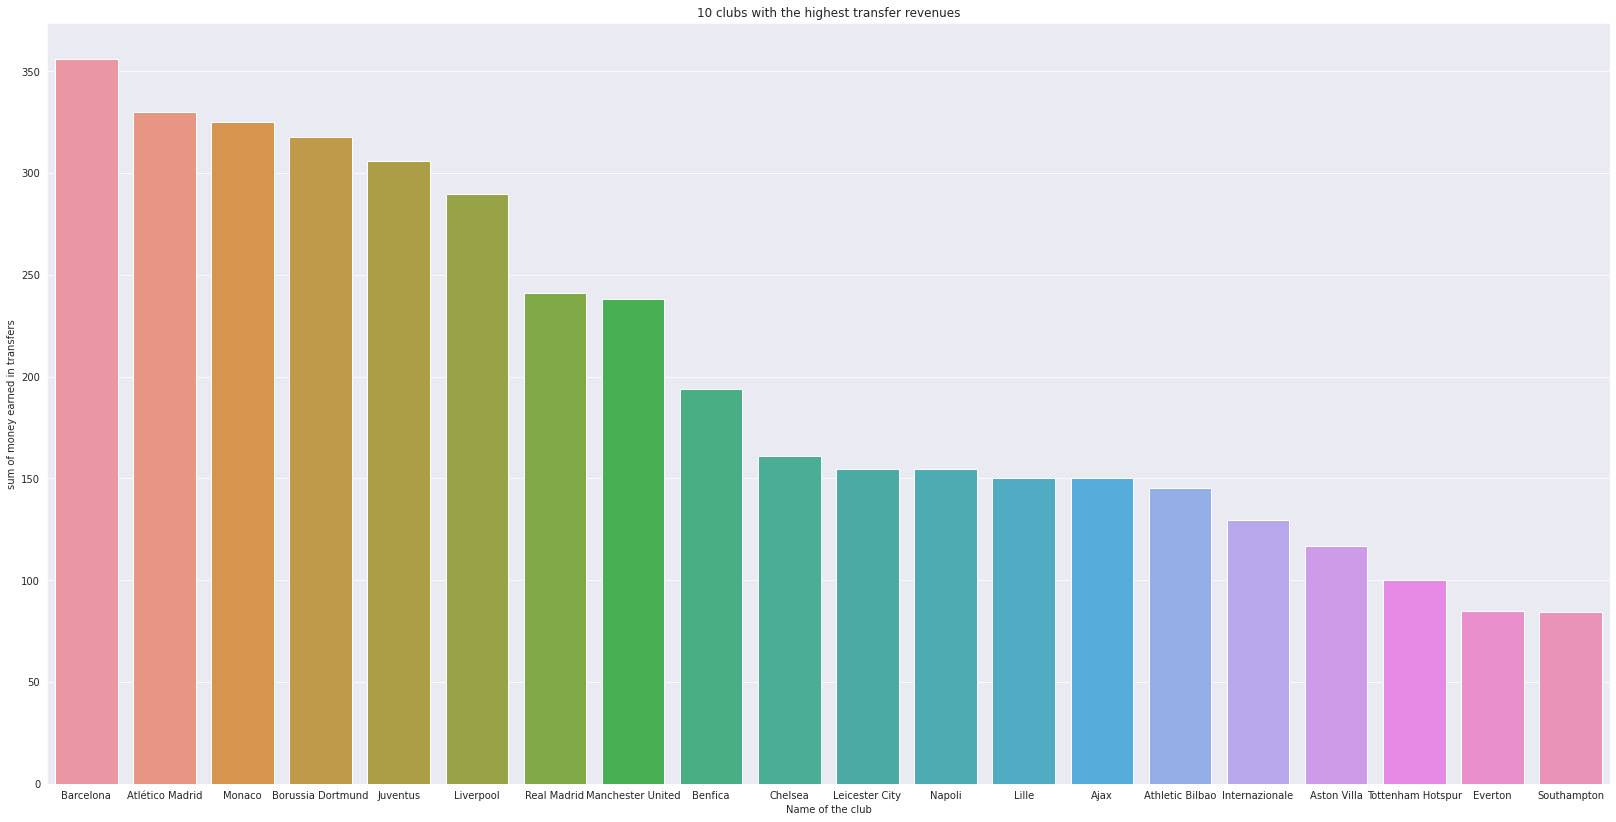

In [9]:
df1 = df1[0:20]
plt.figure(figsize=(28,14))
sns.set_style('darkgrid')
p = sns.barplot(x='From(Club)',y='Fee(€ mln)',data=df1)
p.set( xlabel = "Name of the club", ylabel = "sum of money earned in transfers")
p.set_title("10 clubs with the highest transfer revenues")

In [10]:
df2 = df.groupby('To(Club)', as_index=False,sort=True)['Fee(€ mln)'].sum()
df2 = df2.sort_values('Fee(€ mln)', ascending=False)
df2.head()

,To(Club),Fee(€ mln)
2,Barcelona,656.8
13,Real Madrid,634.0
8,Manchester City,590.5
12,Paris Saint-Germain,590.5
9,Manchester United,437.6


Text(0.5, 1.0, '10 clubs with the highest transfer revenues')

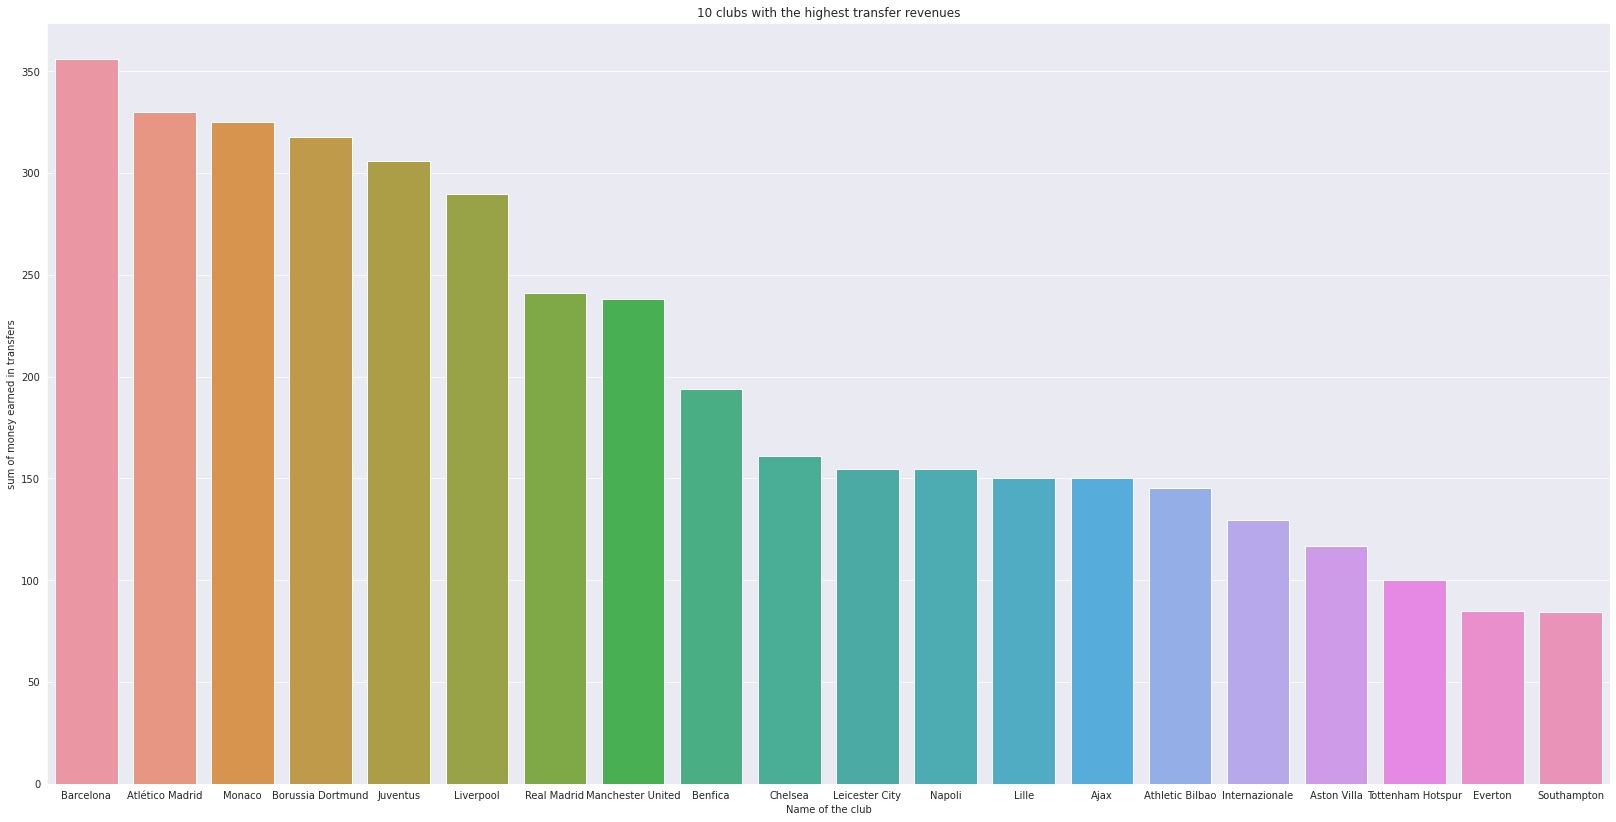

In [11]:
df2 = df1[0:20]
plt.figure(figsize=(28,14))
sns.set_style('darkgrid')
p = sns.barplot(x='From(Club)',y='Fee(€ mln)',data=df2)
p.set( xlabel = "Name of the club", ylabel = "sum of money earned in transfers")
p.set_title("10 clubs with the highest transfer revenues")

Text(0.5, 1.0, 'Fees VS year')

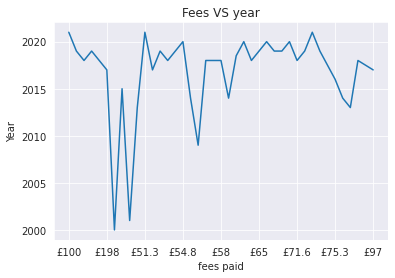

In [12]:
df.groupby('Fee(£ mln)')['Year'].median().plot()
plt.xlabel('fees paid')
plt.ylabel('Year')
plt.title('Fees VS year')

Let's check the average price of a player depending on his position

In [13]:

df3 = df.groupby('Position', as_index=False,sort=True)['Fee(€ mln)'].sum()
df3 = df3.sort_values('Fee(€ mln)', ascending=False)
df3.head()

,Position,Fee(€ mln)
3,Midfielder,1551.6
1,Forward,1491.3
4,Striker,720.5
0,Defender,584.7
2,Goalkeeper,142.5


In [14]:
df4 = df['Position'].value_counts()
df4 = pd.DataFrame(df4)
df4.columns =[ 'Count']
df4

,Count
Midfielder,20
Forward,14
Striker,10
Defender,8
Goalkeeper,2


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


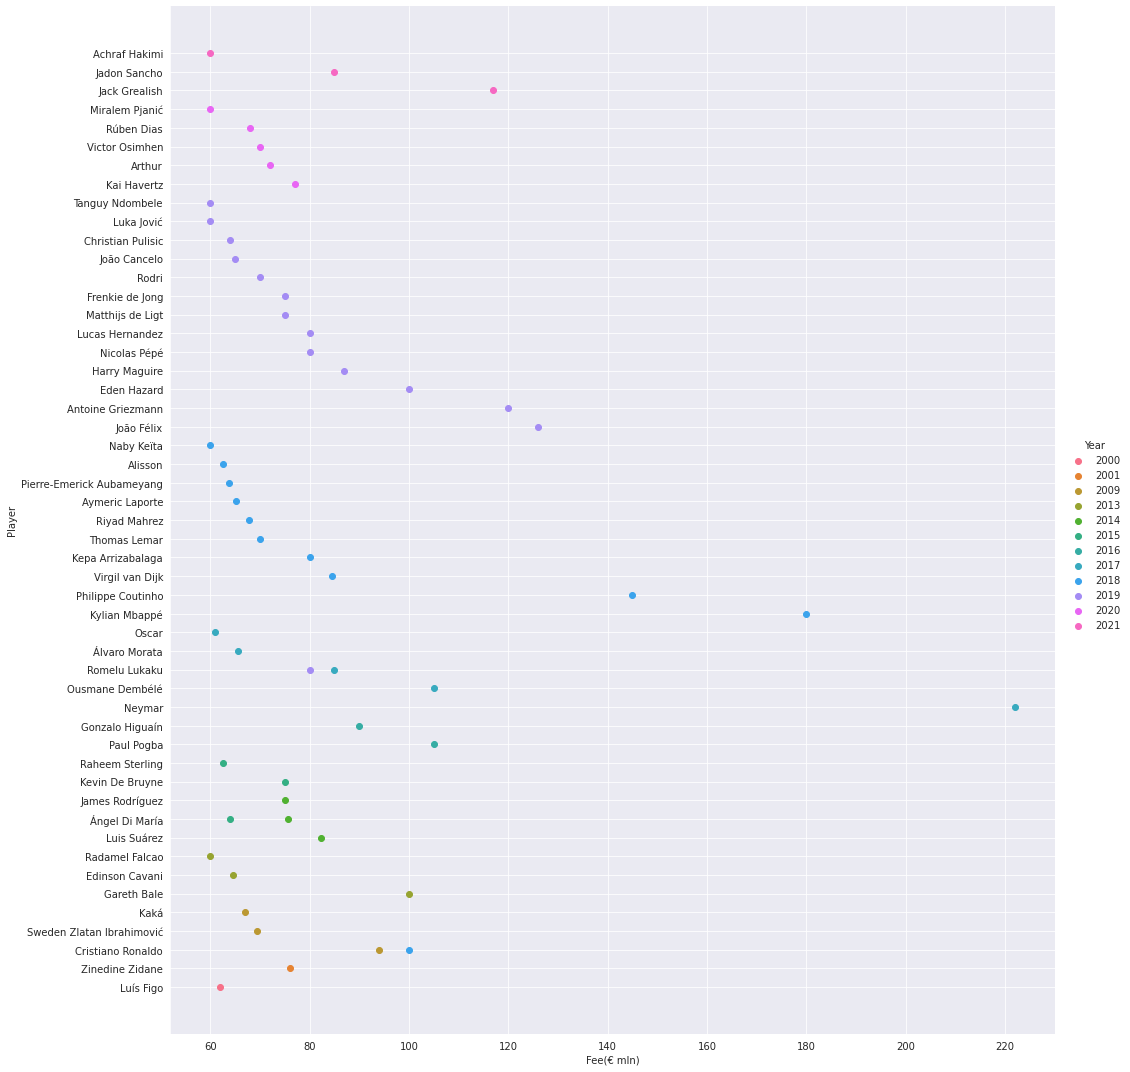

In [15]:
sns.FacetGrid(df,hue="Year",size =15).map(plt.scatter,"Fee(€ mln)","Player").add_legend();
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


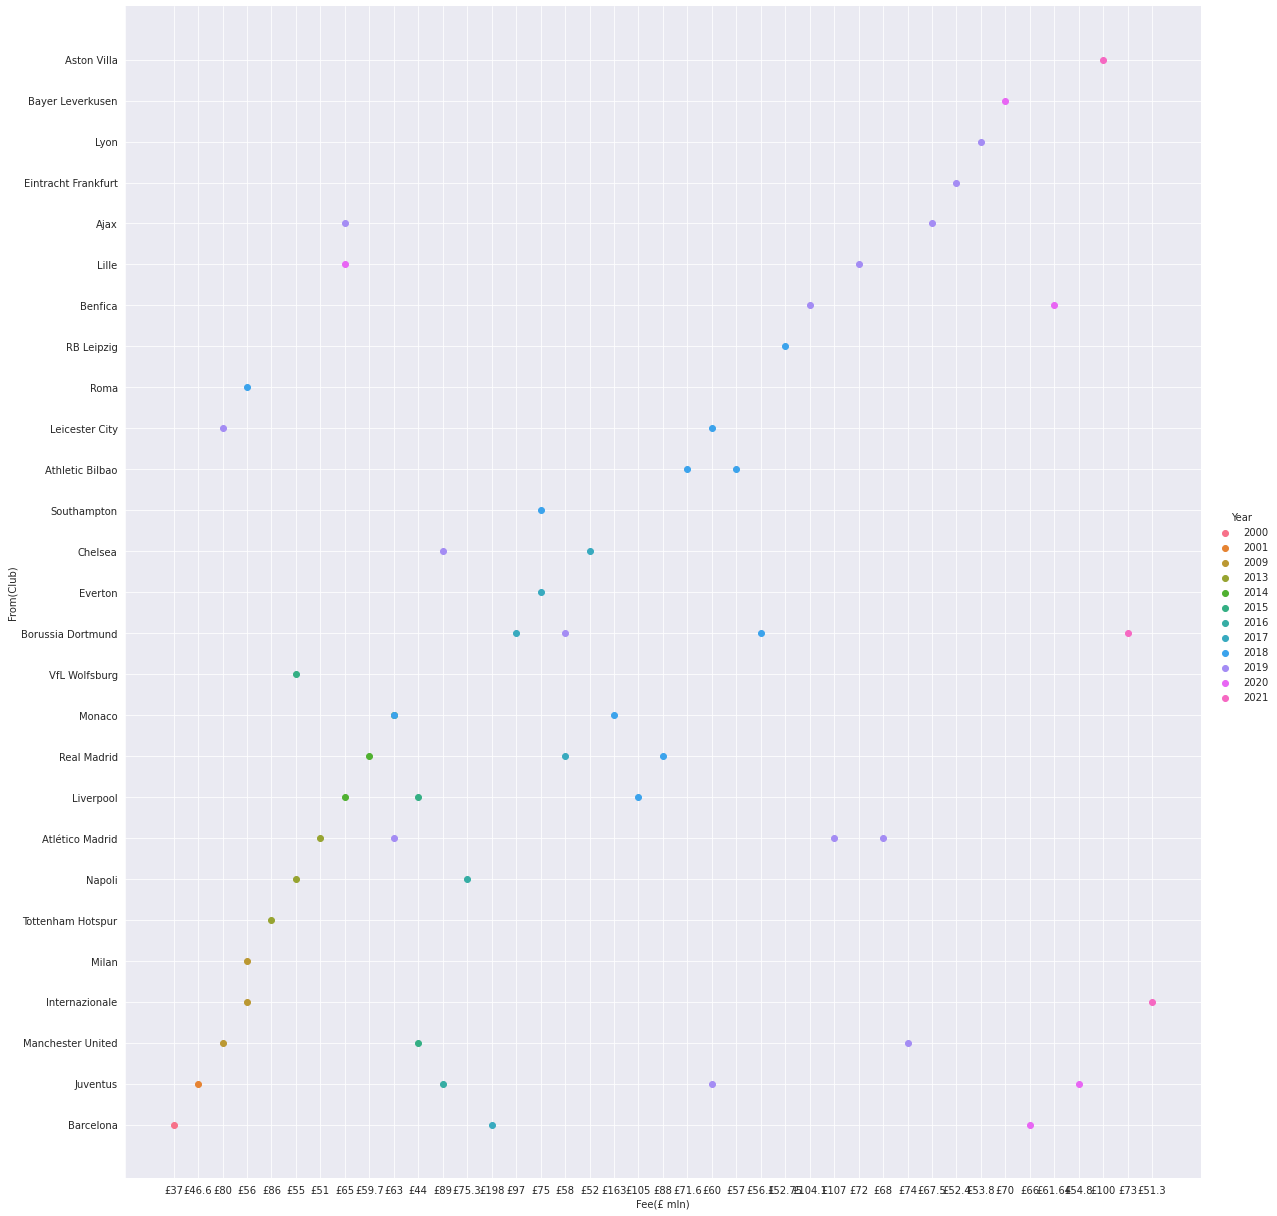

In [16]:
sns.FacetGrid(df,hue="Year",size =17).map(plt.scatter,"Fee(£ mln)","From(Club)").add_legend();
plt.show()

**If you have any comments or questions, please write in the comment**
**please share your valuable thoughts ..!**